# Model Training

###  1.1 Import Data And required Packages 


Importing Pandas,Numpy,Matplotlib,Seaborn,and Waring Library

In [8]:
# Basic import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [9]:
df=pd.read_csv(r"C:\Users\91790\Desktop\EndToEnd Project\ml project\mlproject\notebook\data\stud.csv")

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y Variables

In [11]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [12]:
print('Categories in  gender variable:' ,end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity variable : ",end="")
print(df['race_ethnicity'].unique())

print('Categories in parental level of education variable :',end="")
print(df['parental_level_of_education'].unique())

print('Categories in lunch variable :',end="")
print(df['lunch'].unique())

print('Categories in test preparation course variable: ',end="")
print(df['test_preparation_course'].unique())

Categories in  gender variable: ['female' 'male']
Categories in race/ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable :['standard' 'free/reduced']
Categories in test preparation course variable: ['none' 'completed']


In [14]:
# Create column transformer with 3 type of transformer

num_feature=X.select_dtypes(exclude="object").columns
cat_feature=X.select_dtypes(include="object").columns


from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer



numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()


preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_feature),
        ('StandardScaler',numeric_transformer,num_feature),
    ]
)

In [ ]:
X=preprocessor.fit_transform(X)

In [ ]:
X

In [18]:
X.shape

(1000, 19)

In [21]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate  Function to give all metrics after model training


In [33]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,r2_square


In [40]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regression":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]


for i in range(len(list(models))):
    model=list(models.values())[1]
    model.fit(X_train,y_train) #Train model
    
    
    # Make predication
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    # Evaluate Train and test dataset
    
    model_train_mae , model_train_rmse , model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print("Model perfromance for Training set")
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))
    
    
    print("-----------------------------------------------")
    
    print("Model Performance for test test")
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score : {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')
    

Linear Regression
Model perfromance for Training set
-Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score : 0.8071
-----------------------------------------------
Model Performance for test test
-Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
-R2 Score : 0.8253


Lasso
Model perfromance for Training set
-Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score : 0.8071
-----------------------------------------------
Model Performance for test test
-Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
-R2 Score : 0.8253


Ridge
Model perfromance for Training set
-Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score : 0.8071
-----------------------------------------------
Model Performance for test test
-Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
-R2 Score : 0.8253


K-Neighbors Regression
Model perfromance for Training set
-Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2

### Result

In [41]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
0,Linear Regression,0.82532
1,Lasso,0.82532
2,Ridge,0.82532
3,K-Neighbors Regression,0.82532
4,DecisionTree,0.82532
5,XGBRegressor,0.82532
6,CatBoosting Regressor,0.82532
7,AdaBoost Regressor,0.82532


### Linear Regression

In [43]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.01


### Plot y_pred and y_test

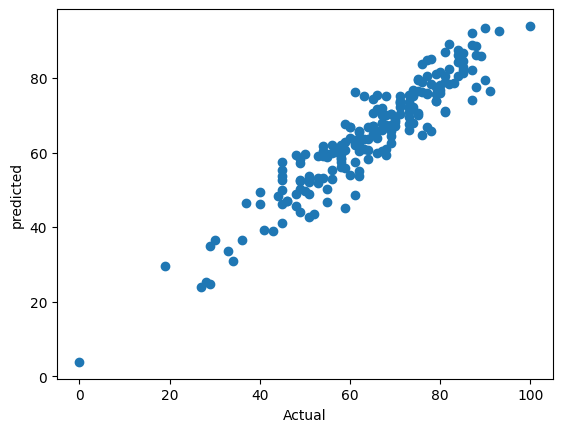

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

<Axes: xlabel='math_score'>

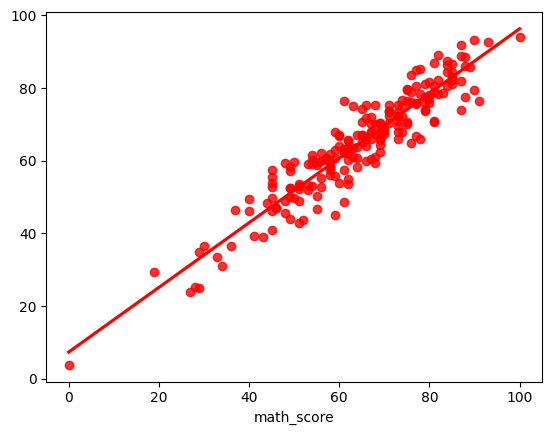

In [47]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

### Difference between Actual and predicted values

In [49]:
pred_df=pd.DataFrame({'Actual values':y_test,'Predicted values': y_pred,'Differnce':y_test-y_pred})
pred_df

,Actual values,Predicted values,Differnce
521,91,76.513672,14.486328
737,53,58.976562,-5.976562
740,80,76.884766,3.115234
660,74,76.710938,-2.710938
411,84,87.521484,-3.521484
...,...,...,...
408,52,43.564453,8.435547
332,62,61.994141,0.005859
208,74,68.009766,5.990234
613,65,67.134766,-2.134766
